<a href="https://colab.research.google.com/github/Heloput/machinelearning/blob/main/Excercise_3_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Упражнение 3
вы уже знаете, как улучшить Fashion MNIST, используя свертки. Теперь посмотрите, можете ли вы улучшить MNIST с точностью до 99,8% или более, используя только один сверточный слой и один MaxPooling 2D. Вам надо будет остановить процесс обучения, как только точность превысит это значение. Это должно произойти менее чем за 20 эпох, поэтому можно точно указать количество эпох для обучения, но ваше обучение должно закончиться, как только значение метрики accuracy достигнет 99,8%. Если это не произойдет, то вам нужно будет изменить дизайн ваших слоев.

Начало кода уже написано - вы должны закончить код

Когда достигнута точность 99,8%, надо распечатать строку «достигнута точность 99,8%, поэтому обучение прервано!»

In [1]:
import tensorflow as tf


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9011 - loss: 0.3359
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9810 - loss: 0.0630
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9884 - loss: 0.0385
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9923 - loss: 0.0251
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9936 - loss: 0.0194
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9954 - loss: 0.0142
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9968 - loss: 0.0090
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9975 - loss: 0.0079
Epoch 9/20
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9985 - loss: 0.0048
Достигнута точность 99.8%, поэтому обучение закончено!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9985 - loss: 0.0048
[0, 1, 2, 3, 4, 5, 6, 7, 8] 0.9980499744415283


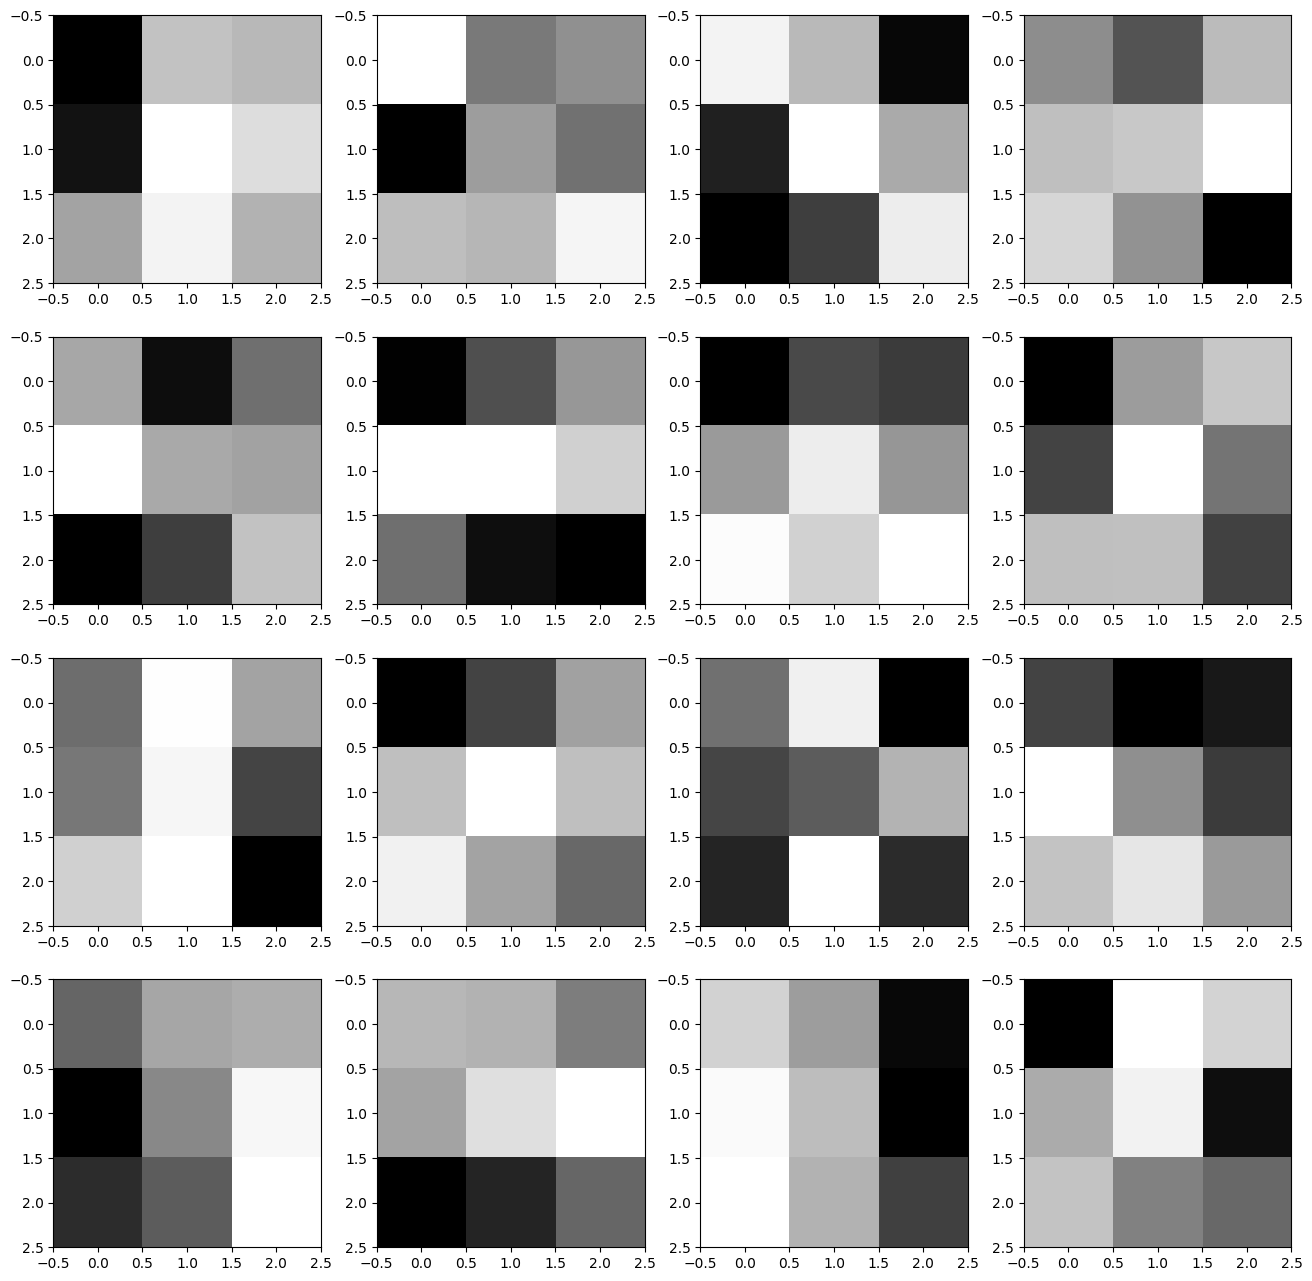

In [4]:
# Ваш код будет здесь
class StopTrainingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get("accuracy") >= 0.998:
            print("\nДостигнута точность 99.8%, поэтому обучение закончено!")
            self.model.stop_training = True
# Ваш код закончится здесь

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Ваш код будет здесь
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
# Ваш код закончится здесь

model = tf.keras.models.Sequential([
        # Ваш код будет здесь
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
        # Ваш код закончится здесь
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model fitting
history = model.fit(
    # Ваш код будет здесь
    training_images, training_labels, epochs=20, callbacks=[StopTrainingCallback()]
    # Ваш код закончится здесь
)
import matplotlib.pyplot as plt
layer = model.layers[0]
fig = plt.figure(figsize=(layer.filters//4*4, 4*4))
for i in range (layer.filters):
  ax = fig.add_subplot(layer.filters//4, 4, i+1 )

  ax.imshow(layer.kernel[:,:,0,i], cmap='gray')

# вывод значения точности
print(history.epoch, history.history['accuracy'][-1])
